**How to use pre-trained models in kernels on Kaggle**

In [1]:
# adapted from https://www.kaggle.com/dansbecker/programming-in-tensorflow-and-keras

import numpy as np 
import pandas as pd
import os
import json
from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array
from IPython.display import Image, display

image_size = 224
def read_and_prep_images(img_paths, img_height=image_size, img_width=image_size):
    imgs = [load_img(img_path, target_size=(img_height, img_width)) for img_path in img_paths]
    img_array = np.array([img_to_array(img) for img in imgs])
    output = preprocess_input(img_array)
    return(output)

def decode_predictions(preds, top=5, class_list_path=None):
    if len(preds.shape) != 2 or preds.shape[1] != 1000:
        raise ValueError('`decode_predictions` expects '
                     'a batch of predictions '
                     '(i.e. a 2D array of shape (samples, 1000)). '
                     'Found array with shape: ' + str(preds.shape))
    CLASS_INDEX = json.load(open(class_list_path))
    results = []
    for pred in preds:
        top_indices = pred.argsort()[-top:][::-1]
        result = [tuple(CLASS_INDEX[str(i)]) + (pred[i],) for i in top_indices]
        result.sort(key=lambda x: x[2], reverse=True)
        results.append(result)
    return results

image_paths = '../input/sample-images-for-kaggle-demos'
image_paths = [os.path.join(image_paths,filename) for filename in os.listdir(image_paths)]
image_data = read_and_prep_images(image_paths)
img_paths = image_paths

test_data = read_and_prep_images(img_paths)

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


**Method 1: Attach a dataset that contains the pre-trained model to your kernel**

In [2]:
# Step 1: Specify the location of the pre-trained model
my_model_1 = ResNet50(weights='../input/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels.h5')

**Method 2: Download the pre-trained model from the internet**

In [3]:
# Step 1: Open the right-side menu in the kernel editor
# Step 2: Enable GPU
# Step 3: Enable internet
my_model_2 = ResNet50(weights='imagenet')

102858752/102853048 [==============================] - 3s 0us/step


**Method 1: Results**

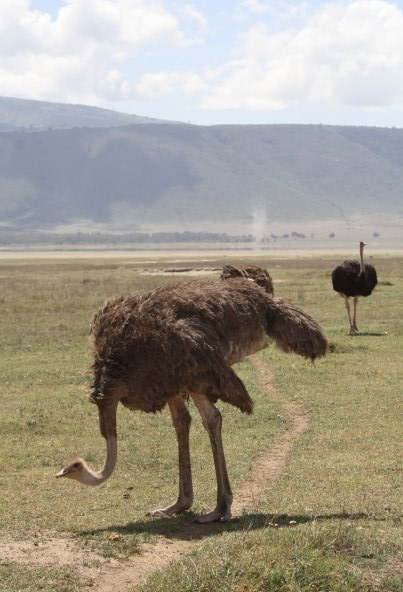

[('n01518878', 'ostrich', 0.99435365)]


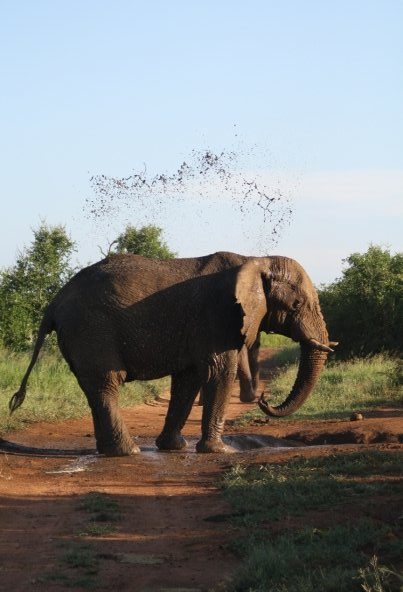

[('n02504458', 'African_elephant', 0.8548923)]


In [4]:
my_model = my_model_1
my_preds = my_model.predict(test_data)
preds = my_preds
most_likely_labels = decode_predictions(preds, top=1, class_list_path='../input/resnet50/imagenet_class_index.json')

for i, img_path in enumerate(img_paths[:2]):
    display(Image(img_path))
    print(most_likely_labels[i])

**Method 2: Results**

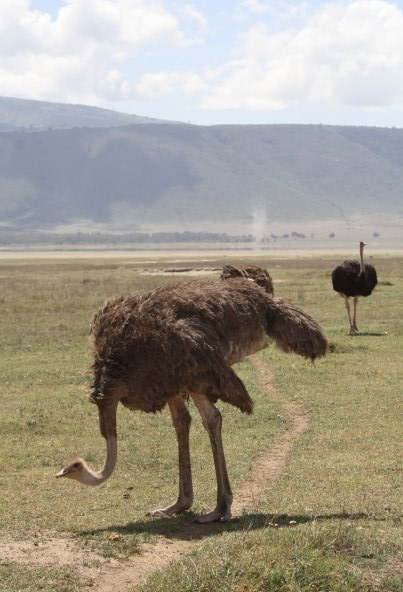

[('n01518878', 'ostrich', 0.99435365)]


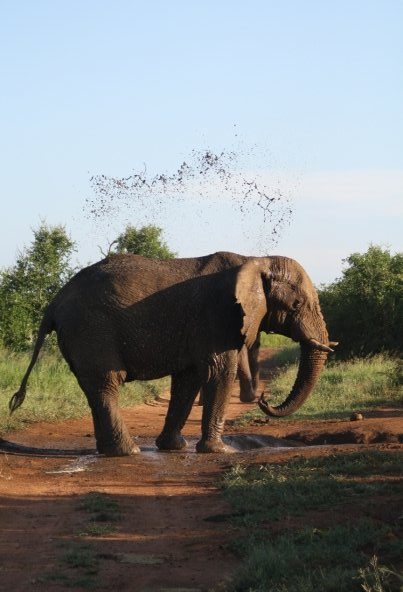

[('n02504458', 'African_elephant', 0.8548923)]


In [5]:
my_model = my_model_2
my_preds = my_model.predict(test_data)
preds = my_preds
most_likely_labels = decode_predictions(preds, top=1, class_list_path='../input/resnet50/imagenet_class_index.json')

for i, img_path in enumerate(img_paths[:2]):
    display(Image(img_path))
    print(most_likely_labels[i])

**You can find pre-trained models in the following locations:**
1. https://www.kaggle.com/keras/datasets
1. https://www.kaggle.com/pytorch/datasets
1. https://www.kaggle.com/gaborfodor/keras-pretrained-models

**Learn more about pre-trained models here:**
* https://www.kaggle.com/dansbecker/transfer-learning